In [5]:
import os
from pathlib import Path
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
# read episode simulations
# calculate cost and carbon emissions for each episode
# calculate total rewards for each episode
# calculate average raeward for each episode

In [7]:
data_directory = Path('/Users/kingsleyenweye/Desktop/INTELLIGENT_ENVIRONMENT_LAB/citylearn/buildsys_2022/data')
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

In [8]:
# read data
episodes = {}

for filename in os.listdir(data_directory):
    if filename.endswith('.pkl'):
        episode = int(filename.split('.')[0].split('_')[-1])

        with (open(os.path.join(data_directory,filename), 'rb')) as openfile:
            episodes[episode] = pickle.load(openfile)

    else:
        continue

episodes = {k:episodes[k] for k in sorted(list(episodes.keys()))}

EOFError: Ran out of input

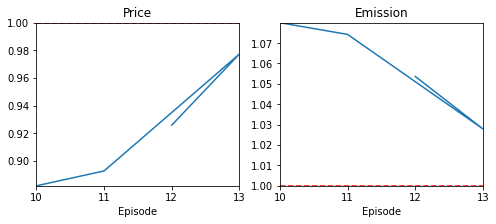

In [9]:
# cost and emission per episode
values = [v['env'].evaluate() for _, v in episodes.items()]
price_values = [v[0] for v in values]
emission_values = [v[1] for v in values]
fig, axs = plt.subplots(1,2,figsize=(8,3))
x = list(episodes.keys())
axs[0].plot(x,price_values)
axs[0].set_title('Price')
axs[0].set_xlabel('Episode')
axs[0].axhline(1,color='red',linestyle='--')
axs[0].set_xticks(x)
axs[1].plot(x,emission_values)
axs[1].set_title('Emission')
axs[1].set_xlabel('Episode')
axs[1].axhline(1,color='red',linestyle='--')
axs[1].set_xticks(x)
plt.show()

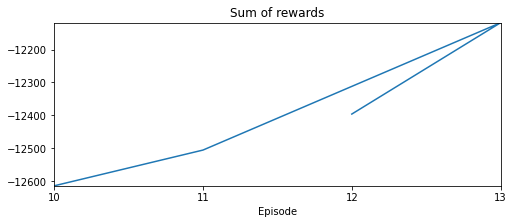

In [10]:
# sum of rewards per episode
rewards = [pd.DataFrame(v['env'].rewards).sum().sum() for _, v in episodes.items()]
fig, ax = plt.subplots(1,1,figsize=(8,3))
x = list(episodes.keys())
ax.plot(x,rewards)
ax.set_xticks(x)
ax.set_title('Sum of rewards')
ax.set_xlabel('Episode')
plt.show()

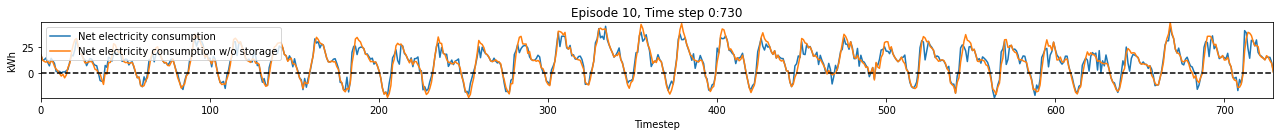

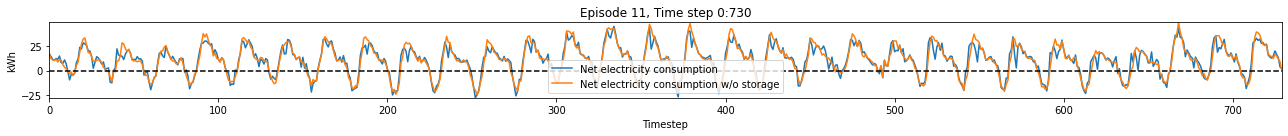

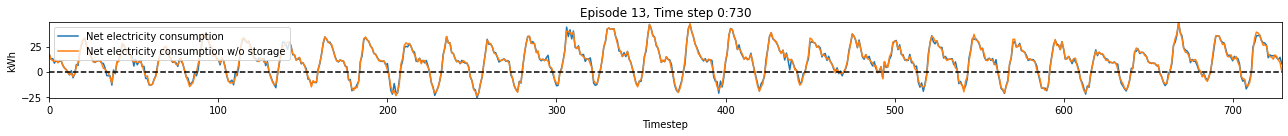

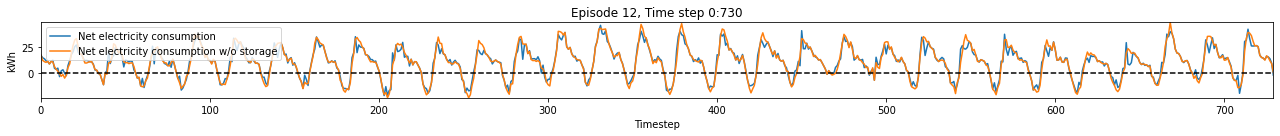

In [11]:
for k, v in episodes.items():
    env = v['env']
    row_count = 1
    column_count = 1
    # start_timestep, end_timestep = 8760 - 24*7, 8760
    # start_timestep, end_timestep = 720*11 + 24*15, 8760
    start_timestep, end_timestep = 0, 730
    fig, ax = plt.subplots(row_count,column_count,figsize=(18*column_count,2*row_count))
    y1 = env.net_electricity_consumption[start_timestep:end_timestep]
    y2 = env.net_electricity_consumption_without_storage[start_timestep:end_timestep]
    y3 = env.electrical_storage_electricity_consumption[start_timestep:end_timestep]
    x = range(start_timestep,start_timestep+len(y1))
    ax.plot(x,y1,label='Net electricity consumption')
    ax.plot(x,y2,label='Net electricity consumption w/o storage')
    # ax.plot(x,y3,label='Electrical storage electricity consumption')
    ax.margins(0)
    ax.axhline(0,color='black',linestyle='--')
    ax.set_title(f'Episode {k}, Time step {start_timestep}:{end_timestep}')
    ax.set_xlabel('Timestep')
    ax.set_ylabel('kWh')
    ax.legend()
    plt.tight_layout()
    plt.show()

In [12]:
# cost to emission ratio
env = episodes[0]['env']
building = env.buildings[0]
ratio = building.pricing.electricity_pricing/building.carbon_intensity.carbon_intensity
fig, ax = plt.subplots(1,1,figsize=(4,2))
ax.hist(ratio)
plt.show()
print('average ratio:',ratio.mean())
print('std ratio:',np.std(ratio))
print('median ratio:',np.median(ratio))
print('minimum ratio:',np.min(ratio))
print('maximum ratio:',np.max(ratio))

# cost to emission scatter
fig, ax = plt.subplots(1,1,figsize=(4,2))
ax.scatter(building.pricing.electricity_pricing, building.carbon_intensity.carbon_intensity)
plt.show()

KeyError: 0

In [ ]:
filepath = Path('/Users/kingsleyenweye/Desktop/INTELLIGENT_ENVIRONMENT_LAB/citylearn/buildsys_2022/simulation.log')

with open(filepath) as f:
    contents = f.readlines()

In [ ]:
filtered_content = [{
    'time_step':int(c.split('Time step: ')[1].split('/')[0].strip()),
    'episode':int(c.split('Episode:')[1].split('/')[0].strip()),
    'timestamp':c.split(': Time step:')[0].strip()
} for c in contents if 'Time step: 1/8759' in c or 'Time step: 8759/8759' in c]
plot_data = pd.DataFrame(filtered_content)
plot_data['timestamp'] = pd.to_datetime(plot_data['timestamp'])
plot_data = plot_data.pivot(index='episode',columns='time_step',values='timestamp')
plot_data['runtime_hrs'] = (plot_data[8759] - plot_data[1]).dt.total_seconds()/3600
plot_data['runtime_+-30%_hrs'] = plot_data['runtime_hrs']*1.3
plot_data

time_step,1,8759,runtime_hrs,runtime_+-30%_hrs
episode,,,,
0,2022-07-08 07:12:28.107,2022-07-08 10:19:11.727,3.112117,4.045752
1,2022-07-08 10:19:25.130,2022-07-08 16:12:32.083,5.885265,7.650844
2,2022-07-08 16:12:45.333,2022-07-08 22:18:53.122,6.102164,7.932813
3,2022-07-08 22:19:09.349,2022-07-09 03:52:17.466,5.552255,7.217931
4,2022-07-09 03:52:36.345,2022-07-09 09:52:16.656,5.994531,7.792890
5,2022-07-09 09:52:43.159,2022-07-09 15:48:51.142,5.935551,7.716216
6,2022-07-09 15:49:21.685,2022-07-09 22:16:28.285,6.451833,8.387383
7,2022-07-09 22:17:03.475,2022-07-10 04:42:22.816,6.422039,8.348651
8,2022-07-10 04:43:00.853,2022-07-10 11:04:59.676,6.366340,8.276242


In [ ]:
# row_count = 1
# column_count = 1
# fig, ax = plt.subplots(row_count,column_count,figsize=(18*column_count,3*row_count))
# start_timestep, end_timestep = 8760 - 24*7, 8760
# # start_timestep, end_timestep = 720*11 + 24*15, 8760

# for i, (k, v) in enumerate(episodes.items()):
#     env = v['env']
#     y1 = env.net_electricity_consumption[start_timestep:end_timestep]
#     y2 = env.net_electricity_consumption_without_storage[start_timestep:end_timestep]
#     y3 = env.electrical_storage_electricity_consumption[start_timestep:end_timestep]
#     x = range(start_timestep,start_timestep+len(y1))
#     ax.plot(x,y1,label=f'Net electricity consumption, {k}')

#     if i == 0:
#         ax.plot(x,y2,label='Net electricity consumption w/o storage')
#     else:
#         pass

#     # ax.plot(x,y3,label='Electrical storage electricity consumption')
    
# ax.axhline(0,color='black',linestyle='--')
# ax.set_title(f'District')
# ax.set_xlabel('Timestep')
# ax.set_ylabel('kWh')
# ax.legend()
# plt.tight_layout()
# plt.show()